# Project Overview

This project aims to analyze AI tools usuage data in 2023,focusing on uncovering trends,seasonal patterns,and insights.By using python powerful data manipulation and visualizations libraries,we do:

- **Clean and preprocess** the data to ensure accuracy.
- **Resample the data** to aggregate it at a monthly level.
- **Apply a rolling window** to smooth the data and highlight trends.
- **Perform seasonal decomposition** to seperate data into trend,seasonal and residual components.
- **Visualize** the fininding effectively.


# Table of Contents
- [Introduction](#introduction)
- [Data Preparation](#data-preparation)
- [Resampling and Rolling Windows](#resampling-and-rolling-windows)
- [Seasonal Decomposition](#seasonal-decomposition)
- [Visualization](#visualization)
- [Conclusion](#conclusion)


## Introduction

In this analysis,we will explore Ai tools usuage data using time series analysis techniques.We clean and preprocess the data,apply resampling and rolling window to analyze trends,decompose the data to identify seasonal patterns,and visualize our findings.

## Data Preparation

Data preparation is crucial as it ensures the data is clean and ready for analysis.


In [35]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



**Description**: Import the essential libraries for data manipulation, visualization, and seasonal decomposition.

In [51]:
#Load Dataset
data_path = r"C:\Users\pc\Downloads\ai_tools_usage_2023.csv"
df = pd.read_csv(data_path)
df.head()


,Tool Name,Category,Usage Count,Month,Region,Industry,User Type
0,DALL-E,Generative AI,7177,4,Africa,Education,Enterprise
1,BERT,Text-to-Image,18848,4,South America,Entertainment,Individual
2,BERT,Generative AI,13036,9,Africa,Technology,SMB
3,DALL-E,Generative AI,23965,11,Africa,Finance,Individual
4,Stable Diffusion,Text-to-Image,18056,10,North America,Healthcare,SMB


In [46]:
#Convert 'Month' Column to Datetime
df['Month'] = pd.to_datetime(df['Month'].astype(str) + '-2023', format='%m-%Y')


In [48]:
#Summarize Usage Count per Month
monthly_usage = df.groupby('Month')['Usage Count'].sum().sort_index()


**Data Preparation** :

**Code Explanation**
- `df['Month'] = pd.to_datetime(df['Month'].astype(str) + '-2023', format='%m-%Y'):` Converts the 'Month' column to a datetime format with the year 2023.
- `monthly_usage = df.groupby('Month')['Usage Count'].sum().sort_index(`): Groups data by month, sums usage counts, and sorts the results by month.


 # Tool Adoption Analysis:




In [54]:
#Resample to Monthly Frequency
monthly_usage = monthly_usage.resample('ME').sum()


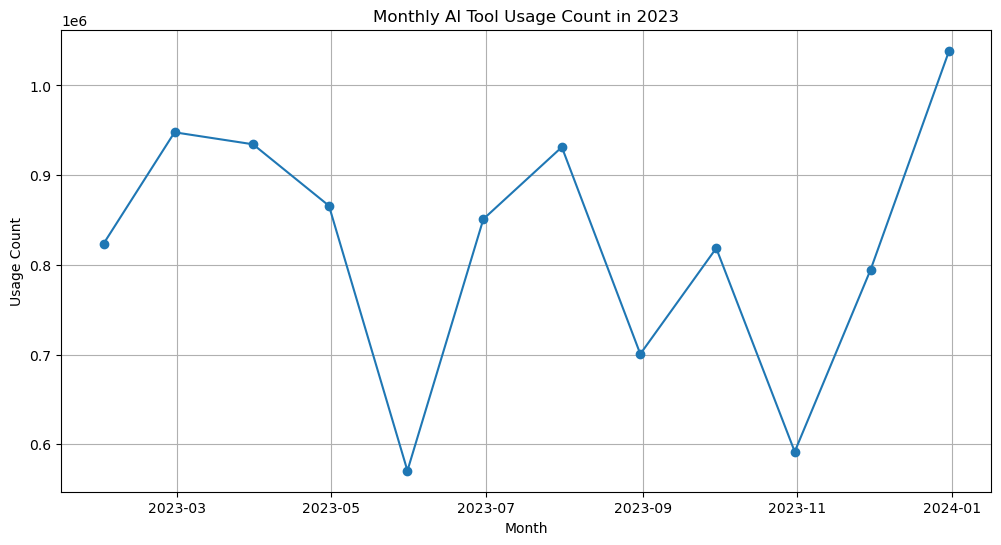

In [56]:
#Plot Time Series Data
plt.figure(figsize=(12, 6))
plt.plot(monthly_usage, marker='o')
plt.title('Monthly AI Tool Usage Count in 2023')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.grid(True)
plt.show()


**Code Explanation** 
- **Resampling and Summing**: The code resamples the monthly_usage data by month-end, summing up the usage counts to ensure proper monthly aggregation.

- **Plot Creation**: A plot is created to visualize the monthly AI tool usage counts in 2023, with circular markers at each data point.

- **Labels and Grid8**: The plot includes labeled axes, a title, and grid lines for better readability.

- **Display Plot**: Finally, the plot is displayed using plt.show() to visualize the data.








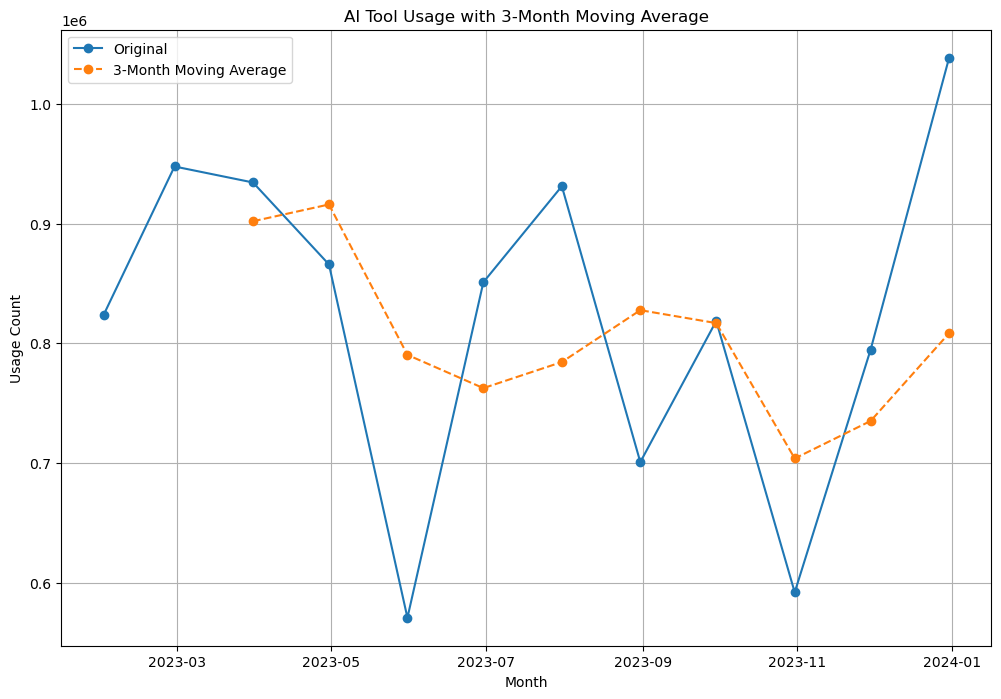

In [59]:
#Rolling Window Analysis
rolling_usage = monthly_usage.rolling(window=3).mean()

plt.figure(figsize=(12, 8))
plt.plot(monthly_usage, label='Original', marker='o')
plt.plot(rolling_usage, label='3-Month Moving Average', marker='o', linestyle='--')
plt.title('AI Tool Usage with 3-Month Moving Average')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.legend()
plt.grid(True)
plt.show()


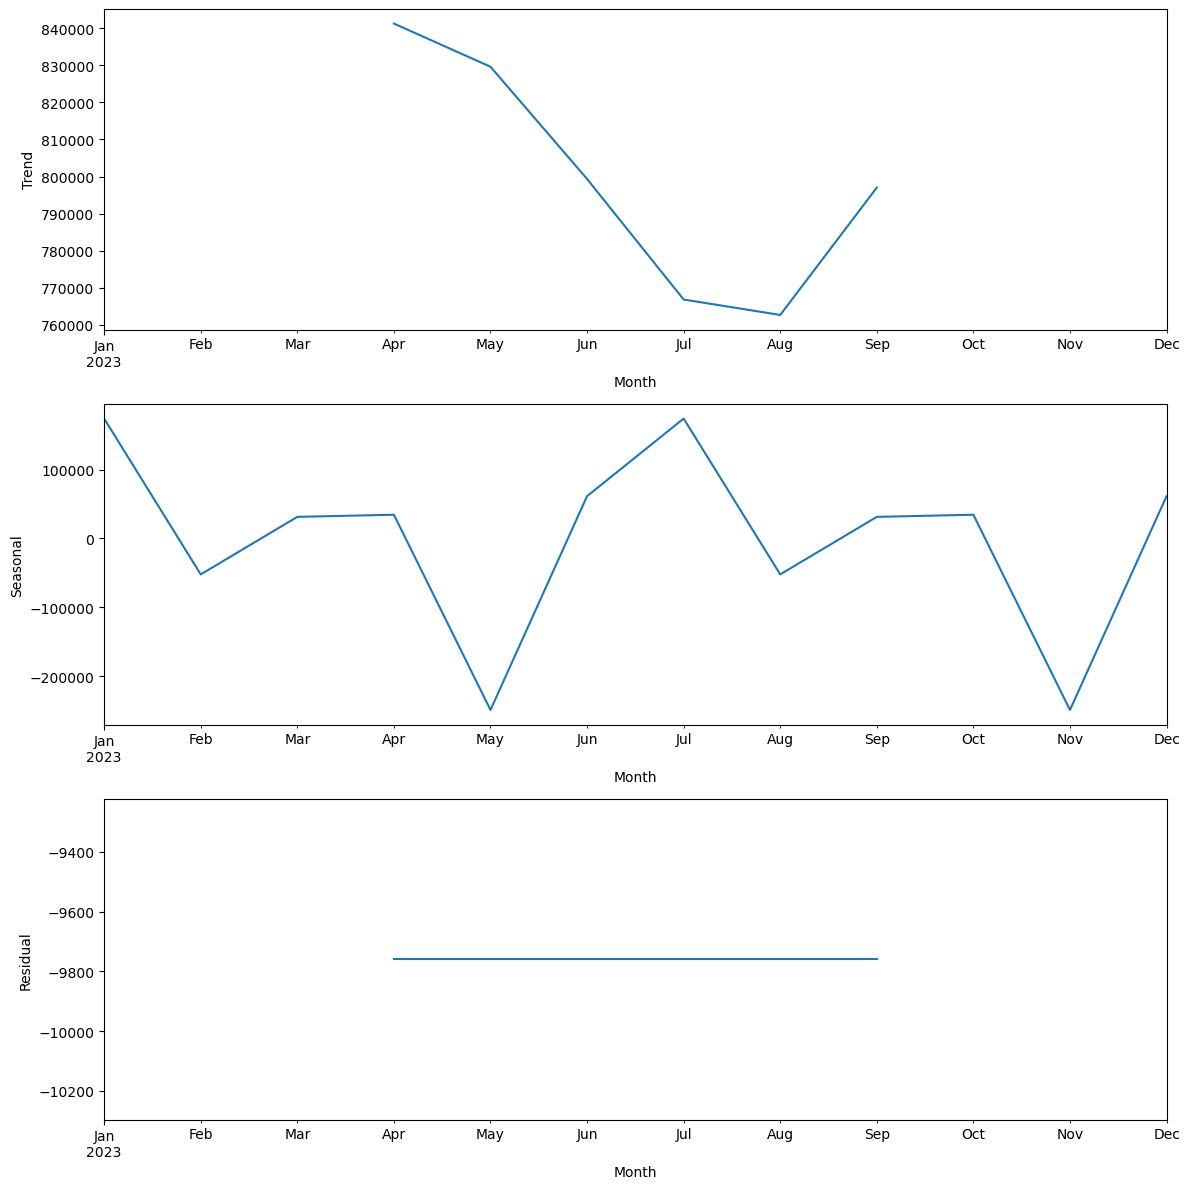

In [61]:
#Seasonal Decomposition
try:
    decomposition = seasonal_decompose(monthly_usage, model='additive', period=6)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
    decomposition.trend.plot(ax=ax1)
    ax1.set_ylabel('Trend')
    ax1.set_xlabel('Month')
    decomposition.seasonal.plot(ax=ax2)
    ax2.set_ylabel('Seasonal')
    ax2.set_xlabel('Month')
    decomposition.resid.plot(ax=ax3)
    ax3.set_ylabel('Residual')
    ax3.set_xlabel('Month')
    plt.tight_layout()
    plt.show()
except ValueError as e:
    print(f"Error in seasonal decomposition: {e}")


**Code Expanation**

This code performs seasonal decomposition of the monthly_usage data using an additive model with a period of 6 months. It then plots the trend, seasonal, and residual components in separate subplots. If an error occurs during decomposition, it prints an error message.








# Trend Forecasting

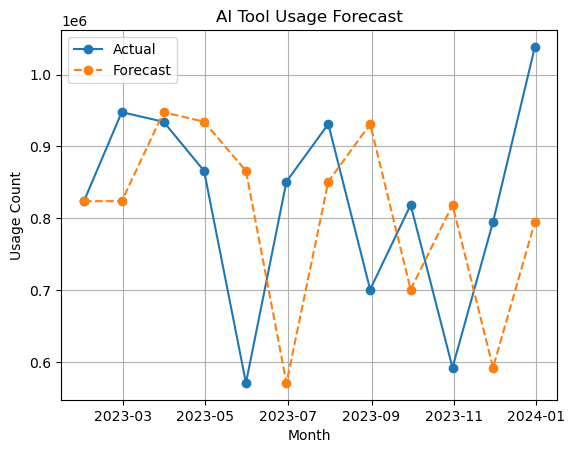

In [66]:
forecast = monthly_usage.shift(1).bfill()
plt.plot(monthly_usage, label='Actual', marker='o')
plt.plot(forecast, label='Forecast', marker='o', linestyle='--')
plt.title('AI Tool Usage Forecast')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.legend()
plt.grid(True)
plt.show()


**Code Explanation** 

The code creates a forecast by shifting the monthly_usage data by one period and filling missing values. It then plots the actual data with circular markers and labels it as 'Actual'.











 # Visualization
 

<Figure size 1200x600 with 0 Axes>

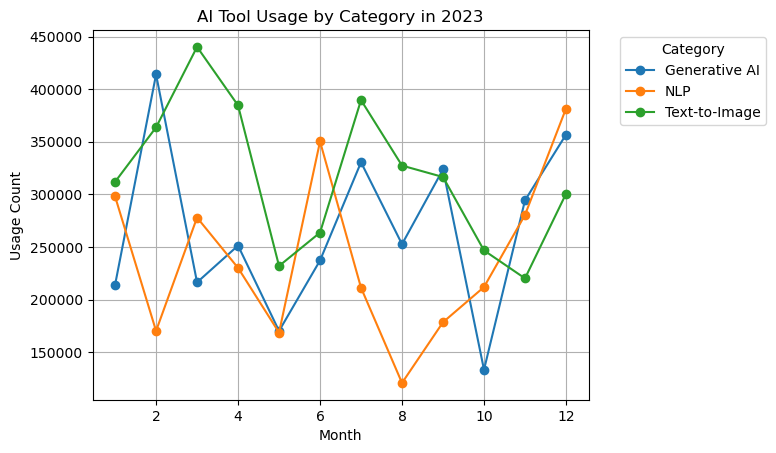

In [75]:
#Analyze tool adoption by category.
category_usage = df.groupby(['Month', 'Category'])['Usage Count'].sum().unstack()

plt.figure(figsize=(12, 6))
category_usage.plot(marker='o')
plt.title('AI Tool Usage by Category in 2023')
plt.xlabel('Month')
plt.ylabel('Usage Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [77]:
#save processed data
processed_data_path = r'C:\Users\pc\Downloads\processed_ai_tools_usage_2023.csv'
df.to_csv(processed_data_path, index=False)
